## Descriptive Analytics


### Descriptive Statistics Measure 
- Mean- represents the arithmethic average
- Median- reperesents the 50th percentile or the middle of the arranged data set.
- Mode- the most frequent value

#### Measures of Dispersions
- Standard Deviation -used to quantify the amount of variation from its mean (standard because the amount of data is standard in a normal curve.
- Variance -square of the standard deviation
- Interquartile Range - measure of statistical dispersion, it is the difference between the 75th and the 25th percentile 
- Skewness- measure of symmetry
 - Negatively Skewed- tail is on the left
 - Normal distribution - no skew, data is normally distributed.
 - Postively Skewed- tail is on the right



In [1]:
from scipy.stats import iqr
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy import stats
from statsmodels.stats import weightstats as stests
from statsmodels.formula.api import ols
from scipy.stats import chi2
import statsmodels.api as sm
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns



df= pd.read_csv('bankdata.csv')
print(df.shape)
print('\n')
print(df.info())

(600, 11)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          600 non-null    int64  
 1   sex          600 non-null    object 
 2   region       600 non-null    object 
 3   income       600 non-null    float64
 4   married      600 non-null    object 
 5   children     600 non-null    int64  
 6   car          600 non-null    object 
 7   save_act     600 non-null    object 
 8   current_act  600 non-null    object 
 9   mortgage     600 non-null    object 
 10  pep          600 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 51.7+ KB
None


In [2]:
df.mean()

age            42.395000
income      27524.031217
children        1.011667
dtype: float64

In [3]:
df.median()

age            42.0
income      24925.3
children        1.0
dtype: float64

In [4]:
df.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [5]:
df['age'].median() #syntax difference in panda

42.0

In [6]:
print(df.loc[:,'age'].median())    
print(df.loc[:,'income'].median())

42.0
24925.3


In [7]:
df.mode()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,40,FEMALE,INNER_CITY,38248.3,YES,0.0,NO,YES,YES,NO,NO
1,43,MALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.std()

age            14.424947
income      12899.468246
children        1.056752
dtype: float64

In [9]:
df.var()

age         2.080791e+02
income      1.663963e+08
children    1.116725e+00
dtype: float64

In [10]:
df.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


### Measure of Association 
- Why conduct a measure of association?
    - if two groups of people with attribute we want to measure (null group, attribute group) in a given interval how much would the attribute have an effect on the individual (hence, we are establishing causality).

#### Covariance
* A descriptive measure of linear association between two variables.
* How two variables changes together
* if Covariance > 0 positive of Covariance < 0 then it is negative

Formula:
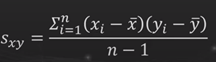

In [11]:
deltime= pd.read_csv('deliverytime.csv')
deltime.head()

,deltime,ncases,distance
0,16.68,7,560
1,11.50,3,220
2,12.03,3,340
3,14.88,4,80
4,13.75,6,150


In [12]:
covar = np.cov(deltime['distance'], deltime['deltime'], ddof=0)[0][1]

In [13]:
covar

4321.54408

#### Correlation Coefficient
* Measures the relationship between 2 variables.
* not affected by the units of measurement unlike covariance
* takes values -1 to 1 if closer to 1 or -1 the relationship is stronger

Formula:
    
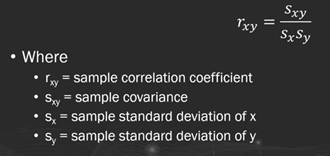

In [14]:
corr= np.corrcoef(deltime['distance'], deltime['deltime'])[0][1]
print(corr)

0.8916700777704646


In [15]:
deltime.corr()

,deltime,ncases,distance
deltime,1.000000,0.964615,0.891670
ncases,0.964615,1.000000,0.824215
distance,0.891670,0.824215,1.000000


In [ ]:
sns.

#### Frequency distribution table

In [143]:
fastfood= pd.read_csv('friedchicken.csv')
fastfood.head()

,respondent,preference
0,1,Jollibee
1,2,McDonald's
2,3,Jollibee
3,4,Wendy's
4,5,Burger King


In [144]:
# Seeing the Frequency Distribution of the values

x=fastfood['preference'].value_counts()
x

Jollibee       18
Shakey's        9
McDonald's      8
Wendy's         7
Pizza Hut       5
Mang Inasal     4
Manang's        4
Burger King     3
Bon Chon        2
Name: preference, dtype: int64

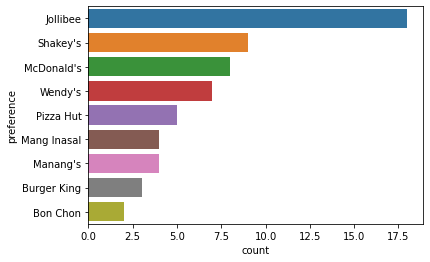

In [150]:
sns.countplot(y=fastfood['preference'],order = fastfood['preference'].value_counts().index, data=fastfood )

In [18]:
df = pd.Series(fastfood['preference']).value_counts()
print(df/len(fastfood['preference']))

Jollibee       0.300000
Shakey's       0.150000
McDonald's     0.133333
Wendy's        0.116667
Pizza Hut      0.083333
Mang Inasal    0.066667
Manang's       0.066667
Burger King    0.050000
Bon Chon       0.033333
Name: preference, dtype: float64


In [19]:
len(fastfood['preference'])

60

##### Determining the size of the bins
* general rule- between 5 and 20 bins
* sqrt(n) or 2^k

In [20]:
servicecalls = pd.read_csv('servicecalls.csv')
servicecalls.head()

,callid,servicetime
0,1,15
1,2,18
2,3,22
3,4,13
4,5,21


In [21]:
#Frequency Distribution - getting the number of bins
n=len(servicecalls['callid'])
k=int(np.sqrt(n))
print(f'the numbers of bin is {k}')

#Computing for the bin width 
binwidth= (servicecalls['servicetime'].max()-servicecalls['servicetime'].min())/k
print (f'the bin width is {binwidth}')

the numbers of bin is 5
the bin width is 3.4


In [22]:
# bin limits
maxservicecalltime = servicecalls['servicetime'].max()
print(maxservicecalltime)
minservicecalltime = servicecalls['servicetime'].min()
print(minservicecalltime)

29
12


In [23]:
np.histogram(servicecalls['servicetime'],5) #automatic assignment of value

(array([ 7,  4, 11,  3,  5], dtype=int64),
 array([12. , 15.4, 18.8, 22.2, 25.6, 29. ]))

In [24]:
hist=np.histogram(servicecalls['servicetime'],[8,13,18,23,28,31], range =(8,31))

###### plotted histogram

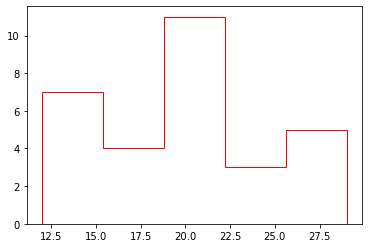

In [25]:
plt.hist(servicecalls['servicetime'], bins=5, range=[12, 29], histtype='step',edgecolor='r')
H, bins = np.histogram(servicecalls['servicetime'], bins=5, range=[12, 29])
H+=np.histogram(servicecalls['servicetime'], bins=5, range=[12, 29])[0]


bincentres = [(bins[i]+bins[i+1])/2. for i in range(len(bins)-1)]

plt.show()


### Hypothesis Testing
* Prediction relevant to the phenomenon under study.
* formal procedure of statistical inferrence

#### Steps in hypothesis testing
1. state the hypothesis
2. Formulate the analysis plan
 - Analysis plan involves taking a random sample and then computing a the test statistics
3. Analyze sample data based on the p-value
4. Interpret the results- reject or accept the null hypothesis

###### Decision Error 
1. Type 1 Error- occurs when the analyst rejects the null Hypothesis even though it is true
2. Type 2 Error- occurs when the analyst fails to reject the null Hypothesis when it is actually false

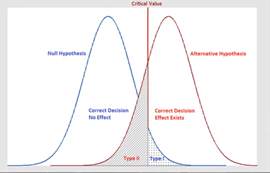

##### P-value- the measure of the strength of the evidence in suppport if the null hypothesis
* if P-value is less than the alpha (0.05) then we reject the null hypothesis

#### One tailed and Two-Tailed Tests
- One-tailed test= the rejection region is only on the one side of the distribution.
 - Null Hypothesis u =< 162
 - Alternative Hypothesis u > 162
 - if alpha is 0.05 then the rejection region is 0.05

- Two-tailed test= the rejection region is at the two sides of the distribution table.
 - Null Hypothesis u = 162
 - Alternative Hypothesis u < 162 or u > 162
 - if alpha is 0.05 then the rejection region is 0.025 on each side.

#### t-test and z-test
- use t-test if n < 30 
- use z-test if n > 30

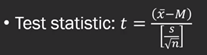


In [151]:
# One Sampled t-test
heights =np.genfromtxt('heights1.csv')
print(heights,'\n')
heights_mean =np.mean(heights)
print(heights_mean,'\n')
tset, pval=ttest_1samp(heights, 162)
print('p-value', pval)

[162.5 162.  169.7 172.  159.  158.4 163.  168.2 175.8 169.  155.5 156.9
 159.1 160.  162. ] 

163.54 

p-value 0.33774546660259697


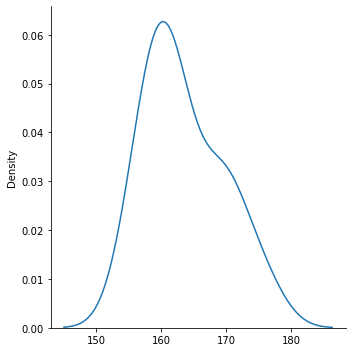

In [153]:
sns.displot(heights, kind="kde")

In [27]:
def pvalue(x):
    if x < 0.05:
        print('Reject the null hypothesis')
    else:
        print('Fail to reject the null hypothesis')
pvalue(pval)

Fail to reject the null hypothesis


#### Two Sample t-test
- Independent Samples t-Test compares 2 independent groups to determine if there is a statistical evidence that the associated population means are significantly different.

Formula:
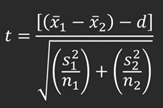


- Null Hypothesis u1=u2
- Alternative Hypothesis u1 != u2

In [28]:
#Two Sampled t-test
week1 = np.genfromtxt('unitsales1.csv', delimiter=',')
week2 = np.genfromtxt('unitsales2.csv', delimiter=',')

print(f'week1 data:- \n {week1} \n')
print(f'week2 data:- \n {week2} \n')

week1_mean=np.mean(week1)
week2_mean=np.mean(week2)
print(f'week1 mean:{week1_mean} \n')
print(f'week2 mean:{week2_mean} \n')


week1_std=np.std(week1)
week2_std=np.std(week2)
print(f'week1 std value {week1_std} \n')
print(f'week2 std value {week2_std} \n')



week1 data:- 
 [170. 169. 177. 179. 166. 165. 170. 175. 183. 176. 163. 164. 166. 167.
 169.] 

week2 data:- 
 [169. 164. 173. 172. 161. 161. 169. 170. 182. 171. 158. 159. 166. 164.
 153.] 

week1 mean:170.6 

week2 mean:166.13333333333333 

week1 std value 5.817215828899595 

week2 std value 7.022503510540635 



In [29]:
ttest, pval = ttest_ind(week1,week2)
print(f'p-value {pval}')
pvalue(pval)

p-value 0.0774950425746379
Fail to reject the null hypothesis


##### Paired Sampled t-Test
- Also called the dependent sample t-test
- a univariate test that tests the significant differnce between 2 related variables
- samples can be about a measure collected for an individual before and after some treatment or condition
 - before and after
 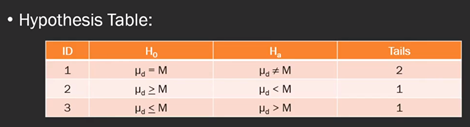

In [30]:
#Paired t-test
df= pd.read_csv('pairedperformance.csv')
print(df.head(),'\n')

print(df.describe(),'\n')
ttest, pval = stats.ttest_rel(df['perf_before'], df['perf_after'])
print(pval)
pvalue(pval)

   perf_before  perf_after
0           62          62
1           67          82
2           78          65
3           67          60
4           63          73 

       perf_before  perf_after
count    15.000000   15.000000
mean     68.333333   70.466667
std       6.388233    8.069932
min      60.000000   60.000000
25%      63.500000   65.000000
50%      67.000000   68.000000
75%      74.000000   78.000000
max      78.000000   83.000000 

0.4178997657102256
Fail to reject the null hypothesis


##### Z-test

In [31]:
df = pd.read_csv('performancez.csv')
ztest, pval =stests.ztest(df['perf_before'], x2=None, value =65)
print(float(pval))
pvalue(pval)

0.0007847889688732645
Reject the null hypothesis


In [32]:
#Two Sample T-test
ztest, pval1= stests.ztest(df['perf_before'], x2=df['perf_after'], value=0, alternative='two-sided')
print(pval1)
pvalue(pval1)

0.217033050353992
Fail to reject the null hypothesis


### ANOVA (F-test) - Analysis if Variance
- Analysis if variancce is regression but for categorical variable
- the F-Statistics tells us that whether there is a statistical difference on the group or not, but doesn't tell us where.
- if there is such difference a follow up t-test of all of the combination of the categorical variable must be conducted in order to identify where in the data the difference lies.
- other testing models works welll with two groups
- f-test works with comparing more than two groups at the same time
    - e.g for instance test whether voter age differs based on some categorical variable like nationality, compare means of each level of the variable (carry our pair cmparison using t-test)
    
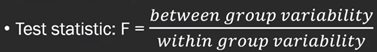

F-Distribution is the critical region

##### Assumptions:
- data is normally distributed
- all population have a common variance (but sometimes can pass)
 - to check use nonparametric levene F test. Rank all data and perform the ANOVA
- independent and random
- factor effect are additive
    
    

### One-way ANOVA
- Only one categorical variable or single factor (one-independent-variable) is considered.
- n for each group can be different

In [33]:
df_anova = pd.read_csv('plantgrowth.csv')
df_anova.head()

,Unnamed: 0,weight,group
0,1,5.61,ctrl
1,2,6.41,ctrl
2,3,6.15,ctrl
3,4,8.11,ctrl
4,5,6.23,ctrl


In [34]:
df_anova= df_anova[['weight', 'group']]
df_anova

,weight,group
0,5.61,ctrl
1,6.41,ctrl
2,6.15,ctrl
3,8.11,ctrl
4,6.23,ctrl
5,5.19,ctrl
6,6.09,ctrl
7,6.50,ctrl
8,6.61,ctrl
9,6.58,ctrl


In [35]:
grps = pd.unique(df_anova.group.values)
grps

array(['ctrl', 'trt1', 'trt2'], dtype=object)

In [36]:
d_data ={grp:df_anova['weight'][df_anova.group==grp] for grp in grps}
d_data

{'ctrl': 0    5.61
 1    6.41
 2    6.15
 3    8.11
 4    6.23
 5    5.19
 6    6.09
 7    6.50
 8    6.61
 9    6.58
 Name: weight, dtype: float64,
 'trt1': 10    5.21
 11    5.34
 12    5.33
 13    4.10
 14    7.76
 15    5.39
 16    7.72
 17    5.03
 18    5.17
 19    6.44
 Name: weight, dtype: float64,
 'trt2': 20    6.79
 21    6.47
 22    6.60
 23    5.78
 24    5.85
 25    5.43
 26    6.87
 27    6.99
 28    6.27
 29    7.05
 Name: weight, dtype: float64}

In [37]:
F, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])
print(f'p-value for significance is: {p}')
pvalue(p)

p-value for significance is: 0.19684951887149554
Fail to reject the null hypothesis


### Two-way ANOVA
- hypothesis test where in the classification of data is based on two-factors (two-independent variable)
- n for each group should be the same

###### Two Way F-Test analysis
- Investigate the grand mean crop yield of the dataset crop yield
- mean crop by each factor
- as well as by the factors grouped together

In [38]:
df_anova2 = pd.read_csv('https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/crop_yield.csv')
df_anova2

,Fert,Water,Yield
0,A,High,27.4
1,A,High,33.6
2,A,High,29.8
3,A,High,35.2
4,A,High,33.0
5,B,High,34.8
6,B,High,27.0
7,B,High,30.2
8,B,High,30.8
9,B,High,26.4


In [39]:
model = ols('Yield ~ C(Fert)*C(Water)', df_anova2).fit()
model

In [40]:
print(f'Overall model F({model.df_model: .0f}, {model.df_resid: .0f})= {model.fvalue: .3f}, p = {model.f_pvalue: .4f}')
res = sm.stats.anova_lm(model, typ=2)
res

Overall model F( 3,  16)=  4.112, p =  0.0243


,sum_sq,df,F,PR(>F)
C(Fert),69.192,1.0,5.766000,0.028847
C(Water),63.368,1.0,5.280667,0.035386
C(Fert):C(Water),15.488,1.0,1.290667,0.272656
Residual,192.000,16.0,NaN,NaN


### Chi-square Test
- Chi-square is applied when you have two categorical variables from a single population
- Used to determine if there is a significant association between these two variables
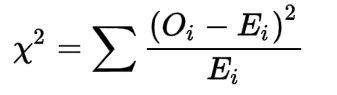

###### Chi-square test Analysis (test for dependecy)
- are there difference in terms of sex their voting preference (Democrat, Republic)
 - null hypothesis: the samples (voting preference and sex) are independent 
 - there is a dependency between the samples (voting preference and sex)
 
 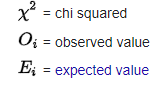
 

In [41]:
#Chi Squared Test
df_chi = pd.read_csv('chi-test.csv')
df_chi

,Gender,Voting Preference
0,Male,Democrat
1,Female,Independent
2,Male,Democrat
3,Female,Republican
4,Female,Democrat
5,Male,Republican
6,Male,Independent
7,Female,Democrat
8,Female,Democrat
9,Male,Republican


In [42]:
contingency_table= pd.crosstab(df_chi['Gender'],df_chi['Voting Preference'])
contingency_table.head()

Voting Preference,Democrat,Independent,Republican
Gender,,,
Female,3,2,2
Male,4,1,3


In [43]:
#Observed Values
Observed_Values = contingency_table.values
Observed_Values

array([[3, 2, 2],
       [4, 1, 3]], dtype=int64)

In [46]:
b= stats.chi2_contingency(contingency_table)
b

(0.6122448979591839,
 0.7362964551863367,
 2,
 array([[3.26666667, 1.4       , 2.33333333],
        [3.73333333, 1.6       , 2.66666667]]))

In [48]:
Expected_Values = b[3]
print(Expected_Values)

[[3.26666667 1.4        2.33333333]
 [3.73333333 1.6        2.66666667]]


In [50]:
no_of_row= len(contingency_table.iloc[0:2,0])
print(no_of_row)

2


In [55]:
no_of_columns= len(contingency_table.iloc[0,0:2])
ddof=(no_of_row-1)*(no_of_columns-1)
print(f'Degree of Freedom {ddof}')
alpha= 0.05

Degree of Freedom 1


In [63]:
chi_square=sum([(o-e)**2/e for o,e in zip(Observed_Values, Expected_Values)])
chi_square_statistic= chi_square[0]+chi_square[1]
print(f'chi-square statistic: {chi_square_statistic}')

critical_value=chi2.ppf(q=1-alpha,df=ddof)
print(f'critical_value: {critical_value}')

p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print(f'p-value: {p_value}')


chi-square statistic: 0.5229591836734695
critical_value: 3.841458820694124
p-value: 0.46958210098308395


In [65]:
print(f'Significance level: {alpha}')
print(f'Degree of Freedom: {ddof}')
print(f'chi-square statistic: {chi_square_statistic}')
print(f'p-value: {p_value}')

Significance level: 0.05
Degree of Freedom: 1
chi-square statistic: 0.5229591836734695
p-value: 0.46958210098308395


In [66]:
if chi_square_statistic >= critical_value:
    print('Reject the null hypothesis, There is a relationship between the categorical variables')
else:
    print('Retain the null hypothesis, There is no relationship between the categorical variables')

Retain the null hypothesis, There is no relationship between the categorical variables


### Levels of analytics
- Descriptive Analytics - explaining the data available (data summarization)
 - Exploratory Data Analysis - involves preliminary exploration of data set prior to a  more rigorous analyses
 - Focused Descriptive Analytics - answewring specific business questions
 

- Diagnostic Analytics
- Predictive Analytics
- Prescriptive Analytics

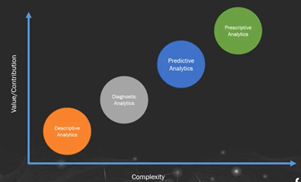

#### Descriptive Analytics Tools

<div>
   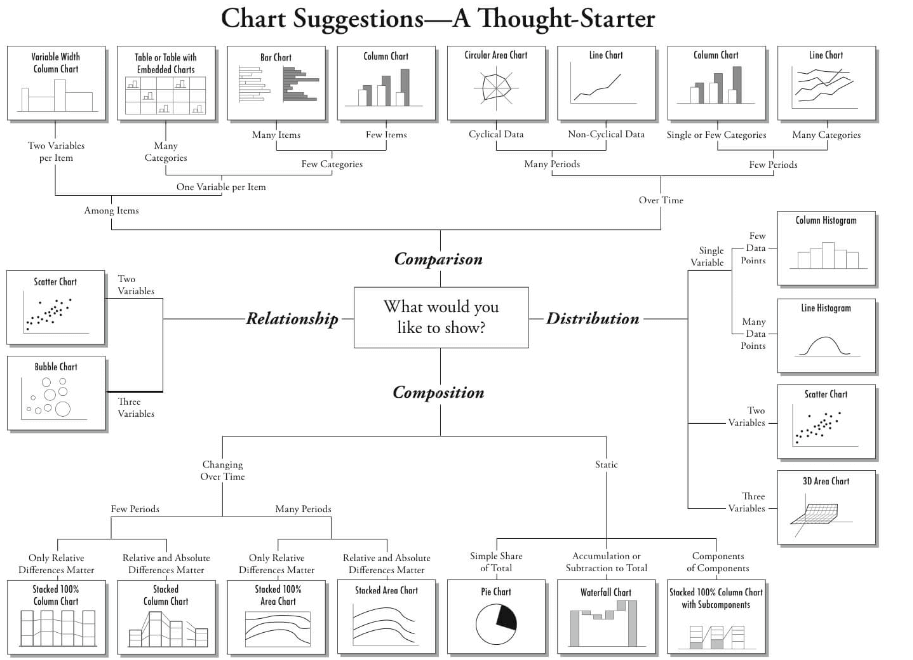
</div>

- Descriptive Statistics
 - Measure of Central Tendency
 - Measure of Dispersion
 - Frequency
- Inferential Statistics
 - Hypothesis Testing
- Data Visualization 
 - Scatterplots



### Diagnostic Analytics Functions
- Identify Anomalies
- Drill Down (Data Discovery)
- Determine Causal Relationships

###### Diagnostic Analytics Tools
- Software capable of drill down analytics
- Measures of association
- Regression analysis
- Time series analysis
- Data Filtering

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [68]:
pd.options.display.max_rows =1000
pd.options.display.max_rows =20


In [74]:
train = pd.read_csv('train.csv')
print(train.head())
quantitative = [f for f in train.columns if train.dtypes[f != 'object']]
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f]=='object']

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [75]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [76]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [77]:
train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


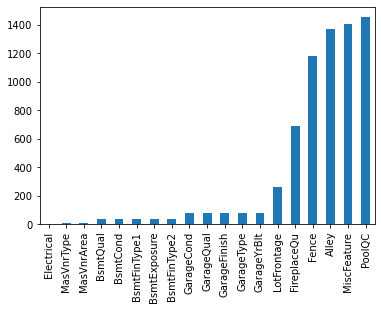

In [82]:
missing = train.isnull().sum()
missing =missing[missing>0]
missing.sort_values(inplace= True)
missing.plot.bar()

C:\Users\tongo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tongo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


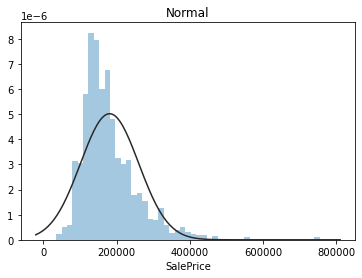

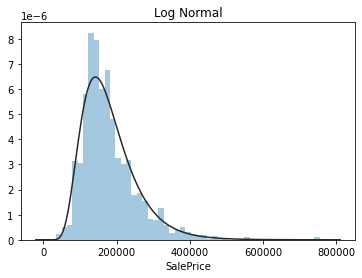

In [89]:
import scipy.stats as st 
y= train['SalePrice']
plt.figure(1); plt.title('Normal')
sns.distplot(y, kde=False,  fit= st.norm)


plt.figure(2); plt.title('Log Normal')
sns.distplot(y, kde=False,  fit= st.lognorm)

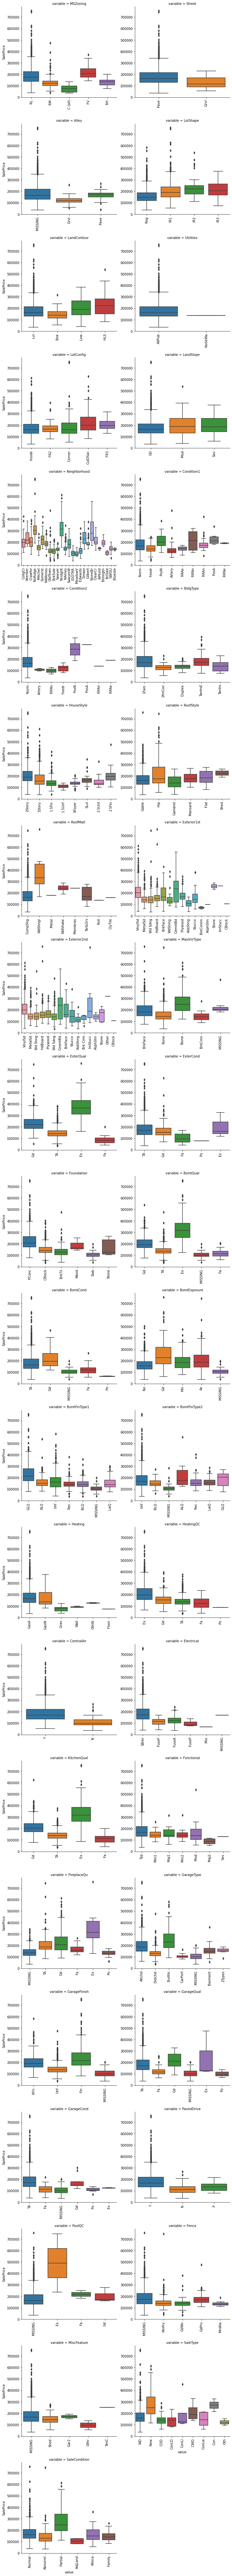

In [98]:
for c in qualitative:
    train[c]= train[c].astype('category')
    if train[c].isnull().any():
        train[c]= train[c].cat.add_categories(['MISSING'])
        train[c]= train[c].fillna('MISSING')

def boxplot(x,y, **kwargs):
    sns.boxplot(x=x,y=y)
    x=plt.xticks(rotation=90)
f=pd.melt(train, id_vars=['SalePrice'], value_vars=qualitative)
g=sns.FacetGrid(f,col='variable', col_wrap=2, sharex=False, sharey=False, height=5)
g=g.map(boxplot, 'value', 'SalePrice')

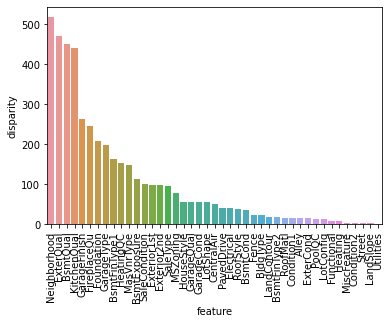

In [107]:
def anova(frame):
    anv= pd.DataFrame()
    anv['feature']=qualitative
    pvals=list()
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s=frame[frame[c]==cls]['SalePrice'].values
            samples.append(s)
        pval= stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval']=pvals
    return anv.sort_values('pval')

a=anova(train)
a['disparity']= np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

In [111]:
def encode(frame, feature):
    ordering=pd.DataFrame()
    ordering['val']=frame[feature].unique()
    ordering.index= ordering.val
    ordering['spmean']= frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering= ordering.sort_values('spmean')
    ordering['ordering']= range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature]== cat, feature +'_E']=o

qual_encoded = []
for q in qualitative: 
    encode(train, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


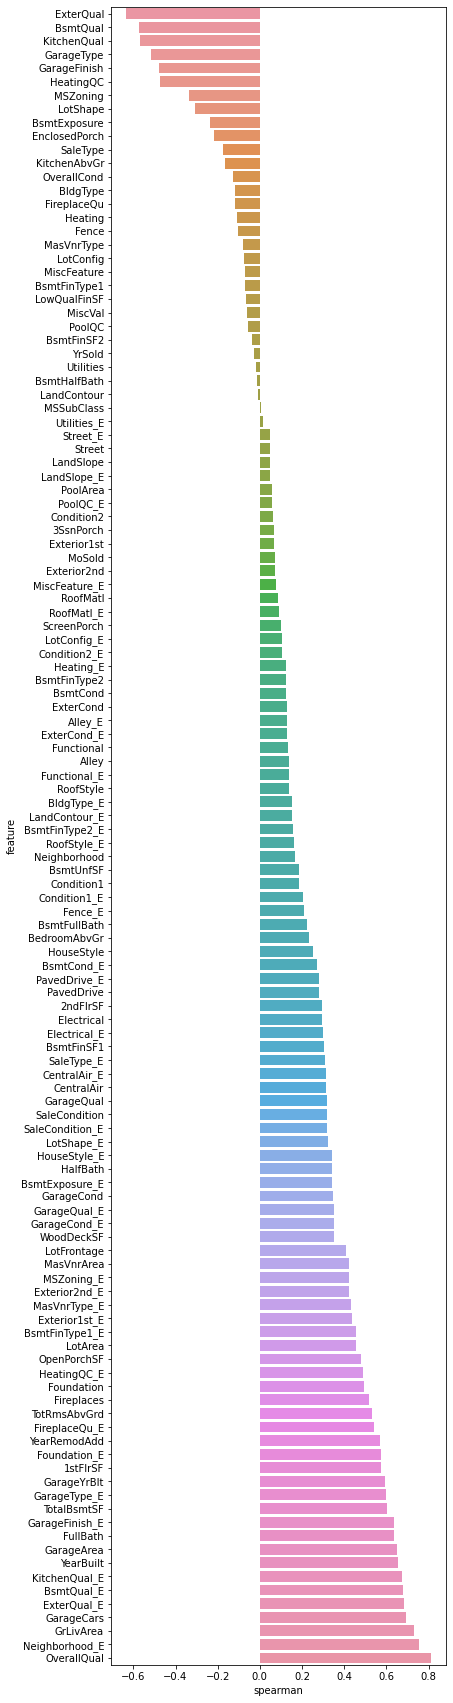

In [113]:
def spearman(frame, features):
    spr=pd.DataFrame()
    spr['feature']=features
    spr['spearman']=[frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr= spr.sort_values('spearman')
    plt.figure(figsize=(6,0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')

features= quantitative + qual_encoded
spearman(train, features)

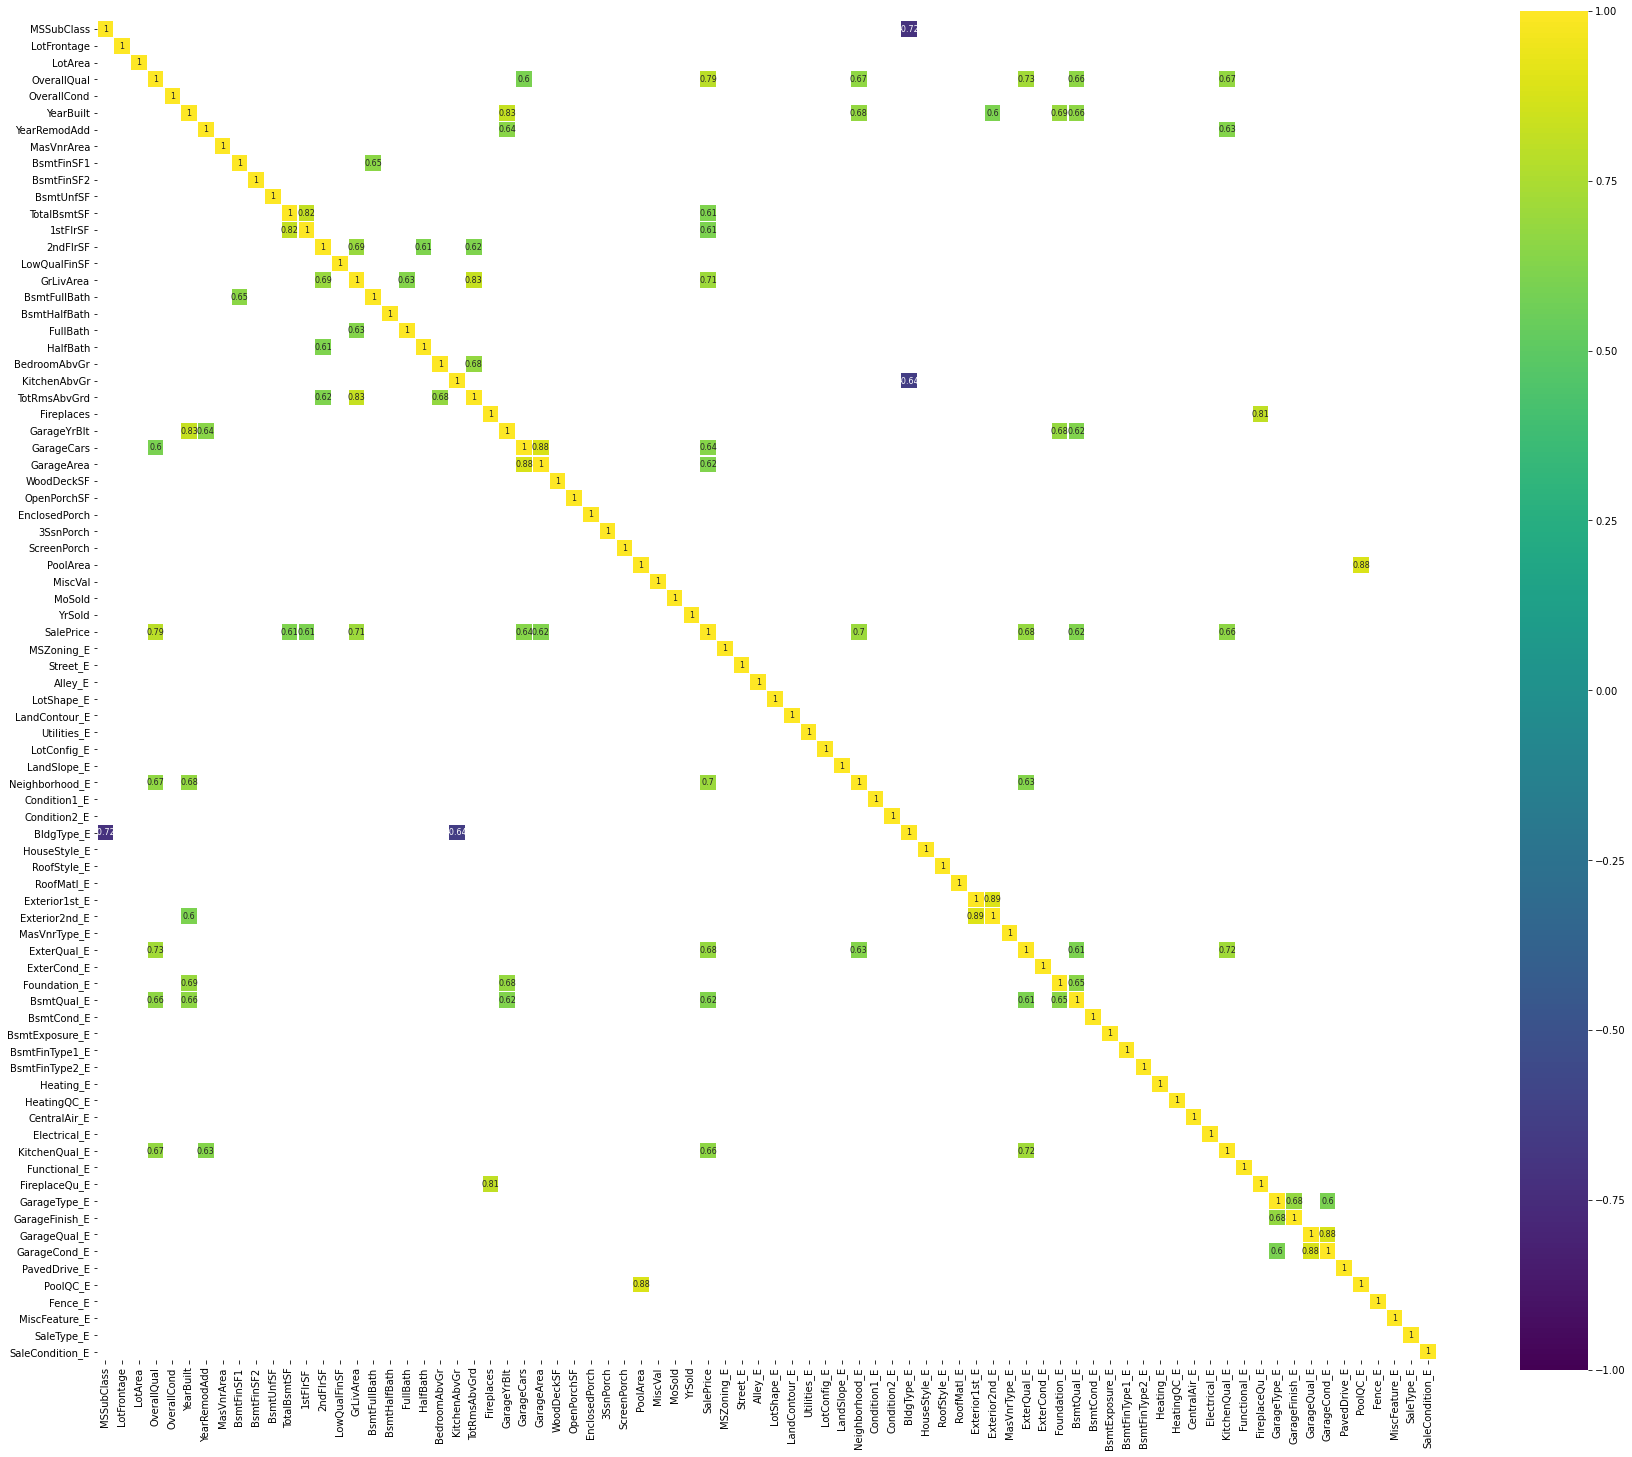

In [120]:
corr = train.dropna
corr =train.drop('SalePrice', axis=1).corr()
corr =train.drop('Id', axis=1).corr()

plt.figure(figsize=(30,25))

sns.heatmap(corr[(corr>=0.6)|(corr <=-0.6)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={'size':8}, square=True);

In [124]:
#Notable Quantitative Variables
quantitative_features_list=[ 'LotFrontage',
 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
  'Fireplaces',
  'GarageCars',
 'GarageArea',
  'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
  'MiscVal',
 'SalePrice']

df_quantitative_values = train[quantitative_features_list]
df_quantitative_values.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,856,856,854,0,1710,1,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,1262,1262,0,0,1262,0,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,920,920,866,0,1786,1,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,756,961,756,0,1717,1,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,1145,1145,1053,0,2198,1,...,3,836,192,84,0,0,0,0,0,250000


In [132]:
#Select The Strongest Variables
df_num = train.select_dtypes(include=['float64','int64'])
df_num_corr= df_num.corr()['SalePrice'][:-1]
golden_features_list= df_num_corr[abs(df_num_corr)>0.5].sort_values(ascending=False)
print(f'There is {len(golden_features_list)} strongly correlated values with SalePrice:\n {golden_features_list}')

There is 18 strongly correlated values with SalePrice:
 SalePrice         1.000000
OverallQual       0.790982
GrLivArea         0.708624
Neighborhood_E    0.696882
ExterQual_E       0.682639
KitchenQual_E     0.659600
GarageCars        0.640409
GarageArea        0.623431
BsmtQual_E        0.622925
TotalBsmtSF       0.613581
1stFlrSF          0.605852
FullBath          0.560664
GarageFinish_E    0.549247
TotRmsAbvGrd      0.533723
FireplaceQu_E     0.525932
YearBuilt         0.522897
YearRemodAdd      0.507101
Foundation_E      0.505503
Name: SalePrice, dtype: float64


In [133]:
features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]
features_to_analyse

['TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

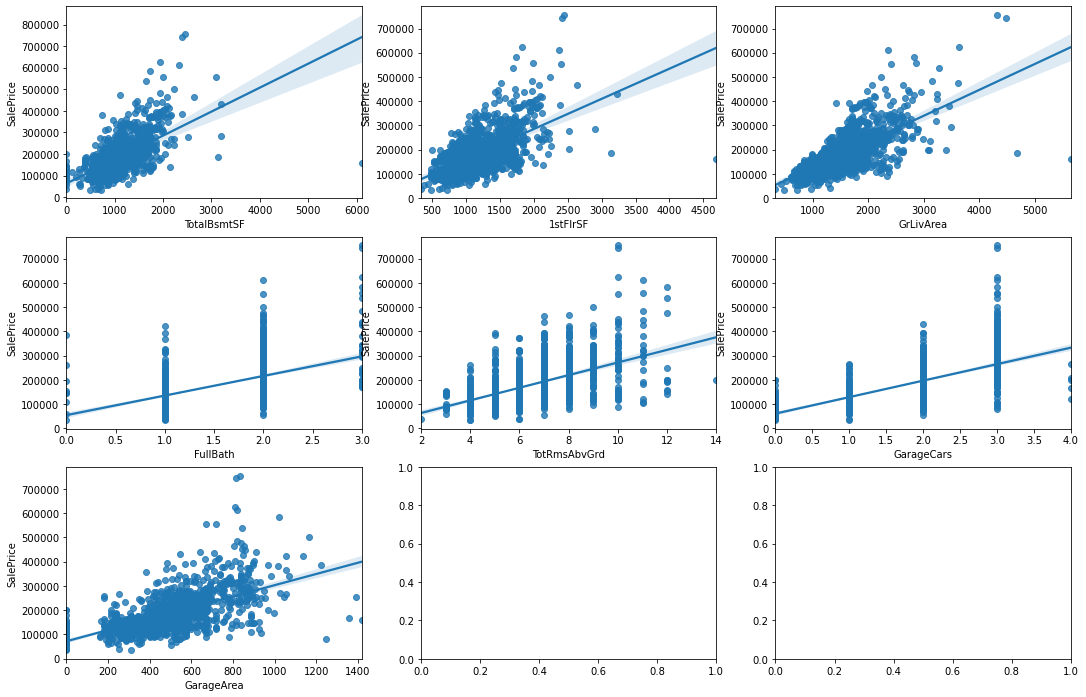

In [134]:
fig, ax= plt.subplots(round(len(features_to_analyse)/3),3, figsize= (18,12))
for i, ax in enumerate(fig.axes):
    if i <len(features_to_analyse)-1:
        sns.regplot(x=features_to_analyse[i], y = "SalePrice", data=df_num[features_to_analyse], ax=ax)